In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/lenovo/Desktop/corrency/Train/'
valid_path = 'C:/Users/lenovo/Desktop/corrency/Test/'

In [4]:
# useful for getting number of output classes
folders = glob('../input/indian-currency-notes-classifier/Train/*')

In [5]:
folders

[]

In [6]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [7]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [9]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [10]:
test_set = test_datagen.flow_from_directory('Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [11]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

e:\old pendrive\corrency\final _currency_project\.venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()
e:\old pendrive\corrency\final _currency_project\.venv\lib\site-packages\keras\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "


Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 5.1699 - accuracy: 0.1503 - val_loss: 2.8184 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 2.1601 - accuracy: 0.2092 - val_loss: 1.8484 - val_accuracy: 0.3095
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 1.7897 - accuracy: 0.3007 - val_loss: 1.7303 - val_accuracy: 0.3095
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 1.5964 - accuracy: 0.3660 - val_loss: 1.4800 - val_accuracy: 0.4286
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 1.2533 - accuracy: 0.5163 - val_loss: 1.4258 - val_accuracy: 0.3810
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.0369 - accuracy: 0.6078 - val_loss: 1.2334 - val_accuracy: 0.4524
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 0.8583 - accuracy: 0.6667 - val_loss: 1.1902 - val_accuracy: 0.5476
Epoch 8/50
5/5 [========================

In [12]:
r.history

{'loss': [5.169862270355225,
  2.16011905670166,
  1.7896662950515747,
  1.5964163541793823,
  1.2533305883407593,
  1.0368894338607788,
  0.8583061695098877,
  0.7408521771430969,
  0.7615406513214111,
  0.6003949046134949,
  0.5053414702415466,
  0.42730119824409485,
  0.33326655626296997,
  0.27539199590682983,
  0.24059809744358063,
  0.33157485723495483,
  0.2641185224056244,
  0.16640549898147583,
  0.13508322834968567,
  0.1245880126953125,
  0.13328422605991364,
  0.1659528613090515,
  0.17622727155685425,
  0.12760552763938904,
  0.09151366353034973,
  0.0958024188876152,
  0.06746622174978256,
  0.0355956144630909,
  0.04403400421142578,
  0.029609642922878265,
  0.04403984546661377,
  0.03487493842840195,
  0.06856214255094528,
  0.04779592528939247,
  0.03962809592485428,
  0.04829050973057747,
  0.053627438843250275,
  0.02842693030834198,
  0.012832460924983025,
  0.011227558366954327,
  0.010784465819597244,
  0.012455498799681664,
  0.02391929179430008,
  0.057342611253

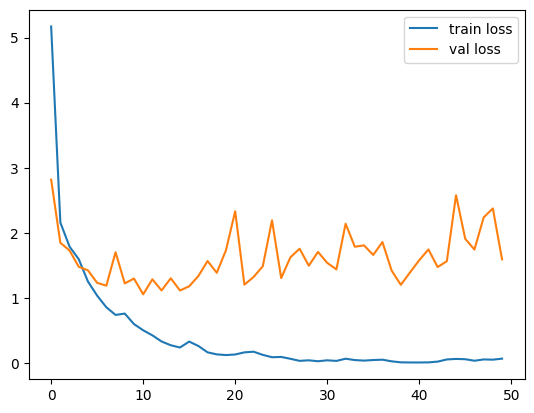

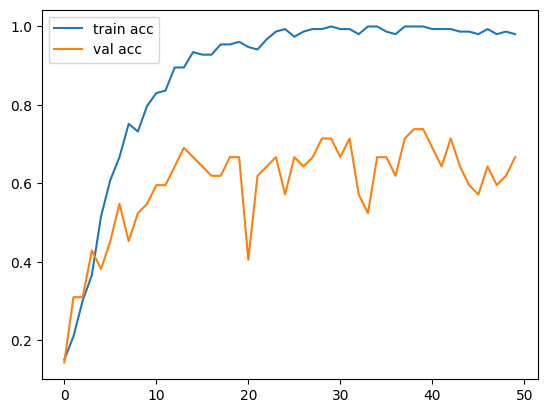

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

Classifier.save('cnn_model.h5')

In [16]:
y_pred = Classifier.predict(test_set)

2/2 [==============================] - 1s 78ms/step


In [17]:
y_pred

array([[1.42765595e-04, 9.64275934e-03, 1.44867485e-07, 9.63768005e-01,
        1.26307551e-02, 2.09492893e-04, 1.36060650e-02],
       [9.26072180e-01, 2.48352023e-07, 7.38366097e-02, 5.88546209e-05,
        2.98941559e-05, 8.46488604e-07, 1.36988763e-06],
       [1.57067858e-04, 2.05634147e-04, 1.98331509e-06, 9.98005331e-01,
        8.02042450e-06, 5.60413231e-04, 1.06157351e-03],
       [1.58635172e-09, 6.50516570e-01, 8.66435035e-10, 4.25919688e-06,
        5.30223076e-07, 2.97507405e-01, 5.19711673e-02],
       [3.44185770e-04, 1.26374454e-17, 3.88220373e-10, 8.23300610e-08,
        9.99655724e-01, 4.46040367e-13, 1.76287862e-09],
       [2.82204926e-01, 1.92770733e-09, 1.88769400e-03, 4.91152644e-01,
        1.42065048e-01, 8.26061815e-02, 8.35434039e-05],
       [9.63281400e-06, 8.96390498e-01, 1.06290173e-07, 3.80016281e-05,
        2.14373766e-04, 9.42756310e-02, 9.07173939e-03],
       [2.25184747e-04, 5.32041411e-10, 9.99774635e-01, 8.98505090e-11,
        1.33406147e-07, 6

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([2, 2, 6, 6, 3, 6, 3, 4, 1, 1, 0, 0, 4, 2, 3, 5, 3, 0, 0, 2, 1, 0,
       2, 2, 0, 1, 0, 2, 5, 1, 6, 3, 3, 3, 5, 1, 5, 1, 4, 4, 6, 6],
      dtype=int64)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
model=load_model('cnn_model.h5')

In [3]:
img=image.load_img(r'Test\2Hundrednote\1.jpg',target_size=(224,224))

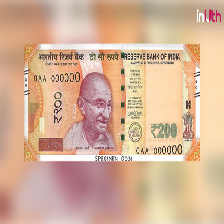

In [4]:
img

In [5]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [6]:
result = model.predict(test_image)
result

1/1 [==============================] - 2s 2s/step


array([[0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
a=np.argmax(model.predict(test_image), axis=1)

1/1 [==============================] - 0s 42ms/step


In [8]:
if a==0:
    print("100")
elif(a==1):
    print("200")
elif(a==2):
    print("2000")
elif(a==3):
    print("500")
elif(a==4):
    print("50")
elif(a==5):
    print("10")
elif(a==6):
    print("20")
        


200
